In [179]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

5


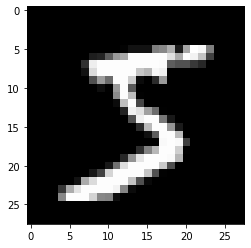

In [180]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

4.1) there are 26506 variables in this model

In [181]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [145]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([5, 5, 6, 3, 3, 7, 3, 6, 3, 5, 6, 8, 8, 9, 3, 2, 6, 3, 0, 8, 3, 5,
       3, 3, 4, 3, 5, 6, 0, 5, 2, 3, 5, 5, 3, 3, 3, 3, 0, 3, 3, 3, 7, 3,
       3, 9, 3, 3, 5, 6, 5, 5, 5, 3, 5, 3, 2, 5, 6, 3, 5, 5, 3, 0, 2, 4,
       0, 0, 5, 6, 3, 5, 3, 8, 8, 3, 3, 0, 6, 5, 6, 5, 3, 5, 6, 3, 0, 5,
       0, 5, 7, 5, 4, 3, 3, 2, 0, 3, 2, 0])

In [146]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [182]:
'''
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)
## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
print(samples_for_evaluation.shape)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()
'''  
def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)

def init_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(32, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
    return model

Q5.1 / Q5.2

Choice of γk ensures a faster decrease : γk=γ0/(k+1)^α, with γ0=1 and α=0.5

batch_size=1 for stochastic gradient descent， >1 for mini-batch gradient descent， n for batch gradient descent


In [183]:
# Stochastic gradient algorithm
import random
def SGD(x_train, y_train, model, batch_size, gamma0=1, alpha=0.5):
  gamma=gamma0
  steps, losses=[],[]
  nb_steps=x_train.shape[0]//batch_size
  allk=np.arange(0,x_train.shape[0])
  np.random.shuffle(allk)
  k_split=np.array_split(allk, nb_steps) #Creating random sequences
  step=0
  for k in k_split:
    if(step%2000==0):
      steps.append(step)
      loss_value=loss(y_train, model(x_train)).numpy()
      losses.append(loss_value) #Store loss value every 2000 drops
      #print(step,loss_value) 
    x_train_batch = x_train[k]
    y_train_batch = y_train[k]
    with tf.GradientTape() as tape:
      logits = model(x_train_batch) #Logits for this minibatch
      loss_value = loss(y_train_batch, logits) #Compute the loss value for this minibatch
    grad = tape.gradient(loss_value, model.trainable_weights) #Use the gradient tape to automatically retrieve the gradients of the trainable variables with respect to the loss.
    update = [tf.math.scalar_mul(-gamma/batch_size, t) for t in grad] #-gamma*grad
    update_weights(model,update)
    gamma = gamma0/((step+1)**alpha)
    step=step+1
  return (steps,losses)

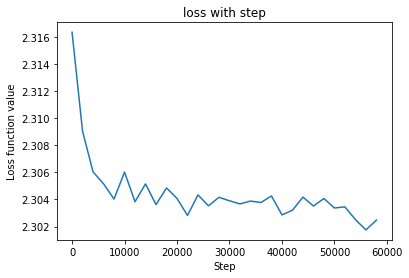

In [184]:
model=init_model()
steps, losses = SGD(x_train, y_train, model, batch_size=1)
plt.plot(steps, losses)
plt.title("loss with step")
plt.xlabel("Step")
plt.ylabel("Loss function value")
plt.show()

Q6.1

update SGD function with : xk+1=xk-γk*grad/batch_size

In [158]:
def SGD2(x_train, y_train, model, batch_size, n_epochs, gamma0=1, alpha=0.5):
  e_steps,e_losses=[],[]
  for epoch in range(1, n_epochs+1):
    steps,losses = SGD(x_train, y_train, model, batch_size, gamma0, alpha)
    e_steps.append(epoch)
    e_losses.append(losses[-1])
    print(epoch,"/",n_epochs," : ",losses[-1])
  return (e_steps, e_losses)

1 / 10  :  2.3413384
2 / 10  :  1.5793843
3 / 10  :  0.85531956
4 / 10  :  0.6143455
5 / 10  :  0.5014231
6 / 10  :  0.4374191
7 / 10  :  0.39776236
8 / 10  :  0.37056386
9 / 10  :  0.35122114
10 / 10  :  0.3346962


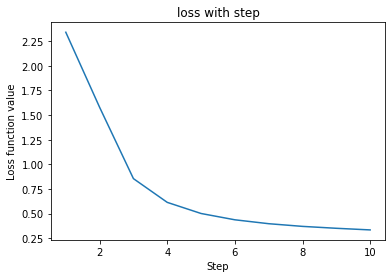

In [164]:
model=init_model()
e_steps, e_losses = SGD2(x_train, y_train, model, batch_size=32, n_epochs=10)
plt.plot(e_steps,e_losses)
plt.title("loss with step")
plt.xlabel("Step")
plt.ylabel("Loss function value")
plt.show()

Q6.2
SGD solves problems such as GD being too computationally intensive and getting stuck in saddle points.

Q7.1 Evaluation of the model

In [168]:
acc = keras.metrics.SparseCategoricalAccuracy()
acc.update_state(y_test, model(x_test))
print(acc.result())

tf.Tensor(0.9159, shape=(), dtype=float32)


In [176]:
logits = model(x_train)
print("model output: \n", np.argmax(logits,1)[0:100])
print("y: \n", y_train[0:100])

model output: 
 [5 0 4 1 9 2 1 3 1 4 3 2 3 6 1 7 2 8 6 9 4 0 9 1 3 2 4 3 7 7 3 8 6 7 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 5 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 0 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
y: 
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
